<a href="https://colab.research.google.com/github/sumitkushwaha2572/Assignment-123/blob/main/Indian_Ev_market_segmentation(Geography_Basis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Modules**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## **Loading the data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EV Maker by Place.csv to EV Maker by Place.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1_ev_charger_dataset.csv to 1_ev_charger_dataset.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EV_Dataset.csv to EV_Dataset.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Statewise_EV_Public_Charging_stations.csv to Statewise_EV_Public_Charging_stations.csv


In [ ]:
# fetching dataset - 1
df1 = pd.read_csv('EV Maker by Place.csv')
df1.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [ ]:
# fetching dataset - 2
df2 = pd.read_csv('1_ev_charger_dataset.csv')
df2.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [ ]:
# fetching dataset - 3
df3 = pd.read_csv('EV_Dataset.csv')
df3.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [ ]:
# fetching dataset - 4
df4 = pd.read_csv('Statewise_EV_Public_Charging_stations.csv')
df4.head()

,State,No. of Operational PCS
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124


## **Exploratory Data Analysis (EDA)**

In [ ]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)
print('DF4 Shape: ', df4.shape)

DF1 Shape:  (62, 3)
DF2 Shape:  (24, 6)
DF3 Shape:  (96845, 8)
DF4 Shape:  (34, 2)


In [ ]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())
print(' <<< DATASET 3 -----------------------------------------------------------')
print(df3.info())
print(' <<< DATASET 4 -----------------------------------------------------------')
print(df4.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
None
 <<< DATASET 3 -------------------------------------

In [ ]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
d4 = df4.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2, '<<< DATASET 3 >>>', d3, '<<< DATASET 4 >>>', d4)

'<<< DATASET 1 >>>'

,EV Maker,Place,State
count,62,62,62
unique,61,36,13
top,Lohia Auto Industries,Pune,Maharashtra
freq,2,7,15


'<<< DATASET 2 >>>'

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


'<<< DATASET 3 >>>'

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


'<<< DATASET 4 >>>'

,No. of Operational PCS
count,34.000000
mean,357.235294
std,617.579099
min,1.000000
25%,18.750000
50%,129.500000
75%,451.250000
max,3079.000000


In [ ]:
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())


EV Maker    0
Place       0
State       0
dtype: int64
Region      0
2W          0
3W          0
4W          0
Bus         0
Chargers    0
dtype: int64
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64
State                     0
No. of Operational PCS    0
dtype: int64


## **Data visualization from dataset 1**

<ipython-input-21-98db2ae8a07d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_maker_count, x='State', y='EV Maker', palette='viridis')


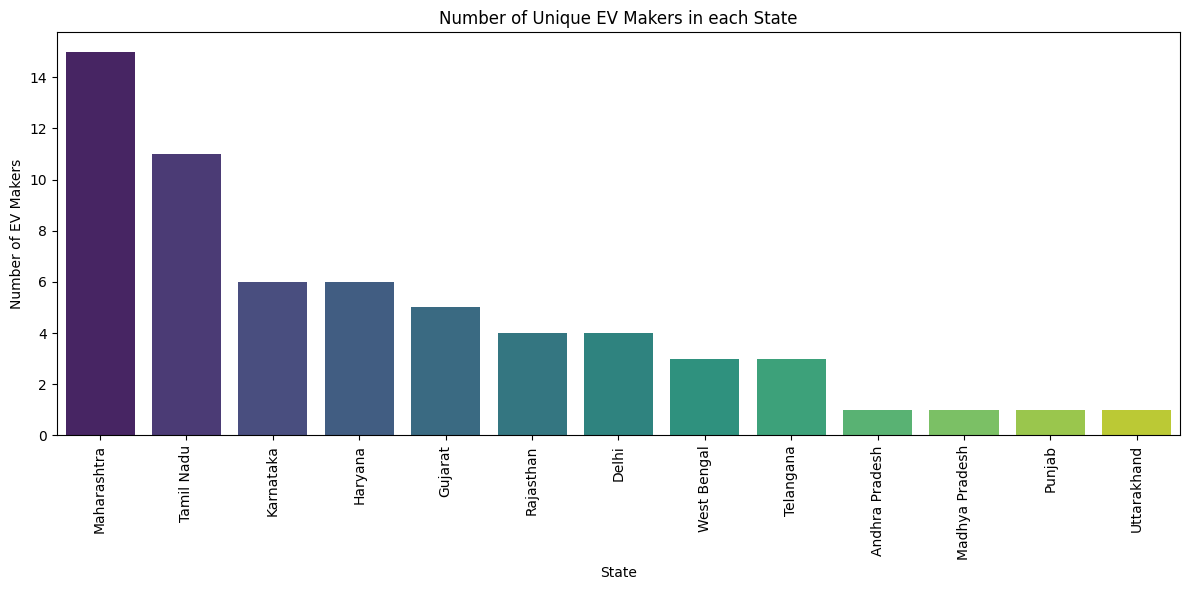

In [ ]:
# 1. State-wise EV Maker Count
state_maker_count = df1.groupby('State')['EV Maker'].nunique().reset_index().sort_values(by='EV Maker', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=state_maker_count, x='State', y='EV Maker', palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Unique EV Makers in each State')
plt.ylabel('Number of EV Makers')
plt.xlabel('State')
plt.tight_layout()
plt.show()

In [ ]:
# 2. Top EV Makers in Each State
top_makers_state = df1.groupby(['State', 'EV Maker']).size().reset_index(name='Count')
top_makers = top_makers_state.sort_values(['State', 'Count'], ascending=[True, False])

print(top_makers.head(20))  # show top 20 rows


             State                     EV Maker  Count
0   Andhra Pradesh             Kia Motors India      1
1            Delhi  Dilli Electric Auto Pvt Ltd      1
2            Delhi                 Euler Motors      1
3            Delhi                Hero Electric      1
4            Delhi          YC Electric Vehicle      1
5          Gujarat         Ajanta Manufacturing      1
6          Gujarat                    Atul Auto      1
7          Gujarat           Electrotherm India      1
8          Gujarat               MG Motor India      1
9          Gujarat              Triton Electric      1
10         Haryana                Hero MotoCorp      1
11         Haryana                     JBM Auto      1
12         Haryana          Maruti Suzuki India      1
13         Haryana         Omega Seiki Mobility      1
14         Haryana                Revolt Motors      1
15         Haryana           Terra Motors India      1
16       Karnataka    Altigreen Propulsion Labs      1
17       K

<ipython-input-23-975a67455383>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_count.index, y=place_count.values, palette='coolwarm')


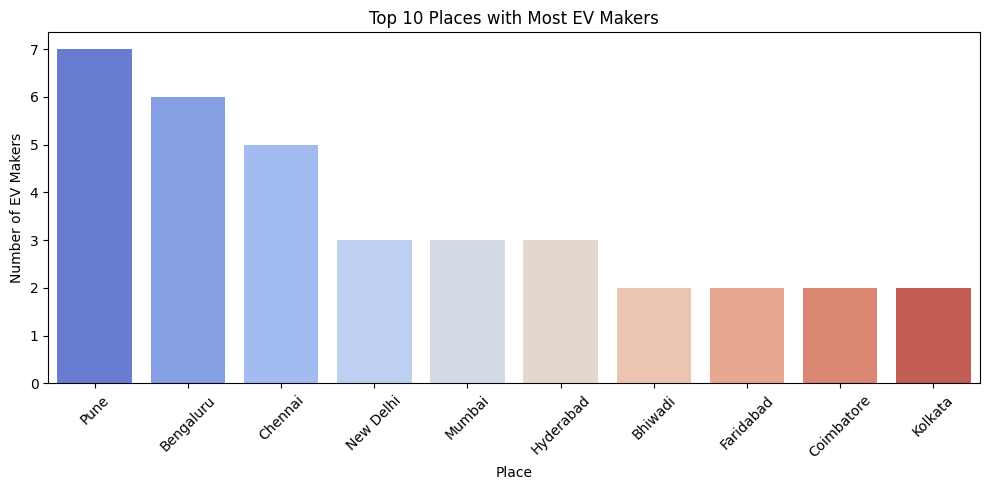

In [ ]:
# 3. Top 10 Cities (Places) with Most EV Makers
place_count = df1['Place'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=place_count.index, y=place_count.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Places with Most EV Makers')
plt.ylabel('Number of EV Makers')
plt.xlabel('Place')
plt.tight_layout()
plt.show()

## **Data visualization from dataset 2**

<ipython-input-24-48406f1565f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, y=df2['Region'].sort_values(ascending=True), x='2W', palette='viridis')


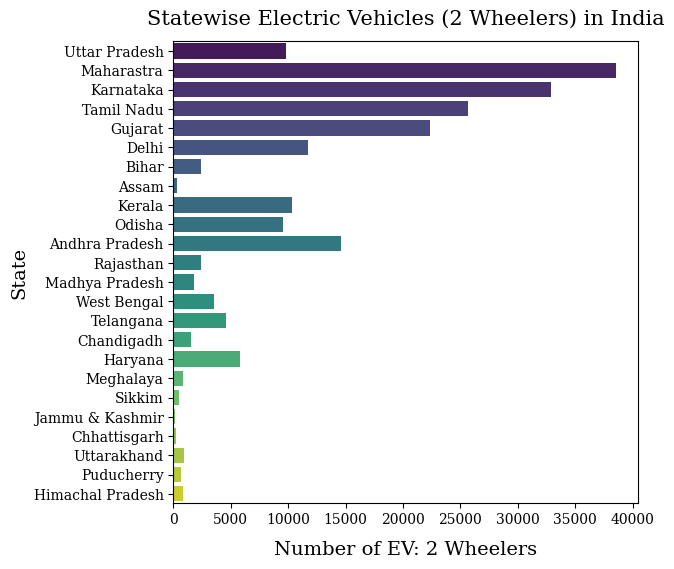

<Figure size 640x480 with 0 Axes>

In [ ]:
# 2 wheelers data visualization
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y=df2['Region'].sort_values(ascending=True), x='2W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()
plt.savefig('my_plot.png')


<ipython-input-25-176b40e6e332>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, y=df2['Region'].sort_values(ascending=True), x='3W', palette='viridis')


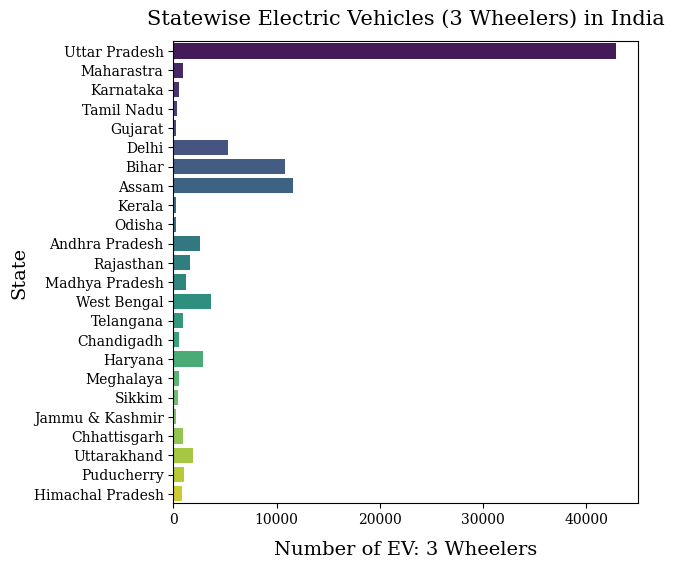

In [ ]:
# 3 wheelers data visualization
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y=df2['Region'].sort_values(ascending=True), x='3W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-26-9d02f1cbcba6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, y=df2['Region'].sort_values(ascending=True), x='4W', palette='viridis')


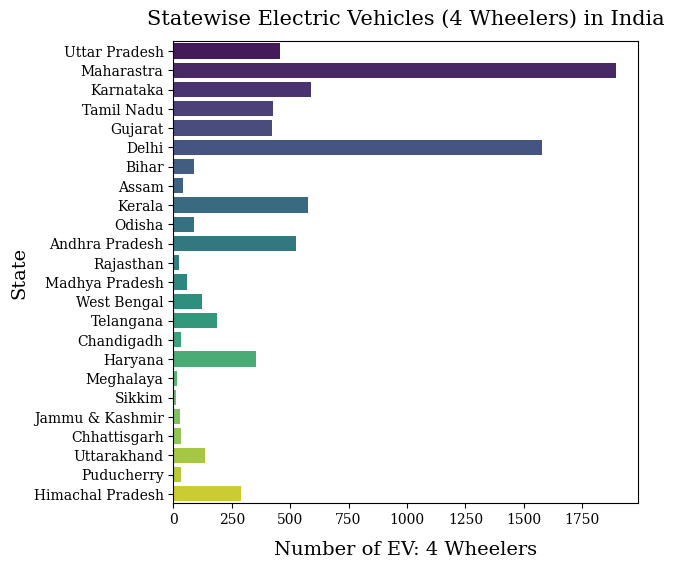

In [ ]:
# 4 wheelers data visualization
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y=df2['Region'].sort_values(ascending=True), x='4W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

## **Data visualization from dataset 3**

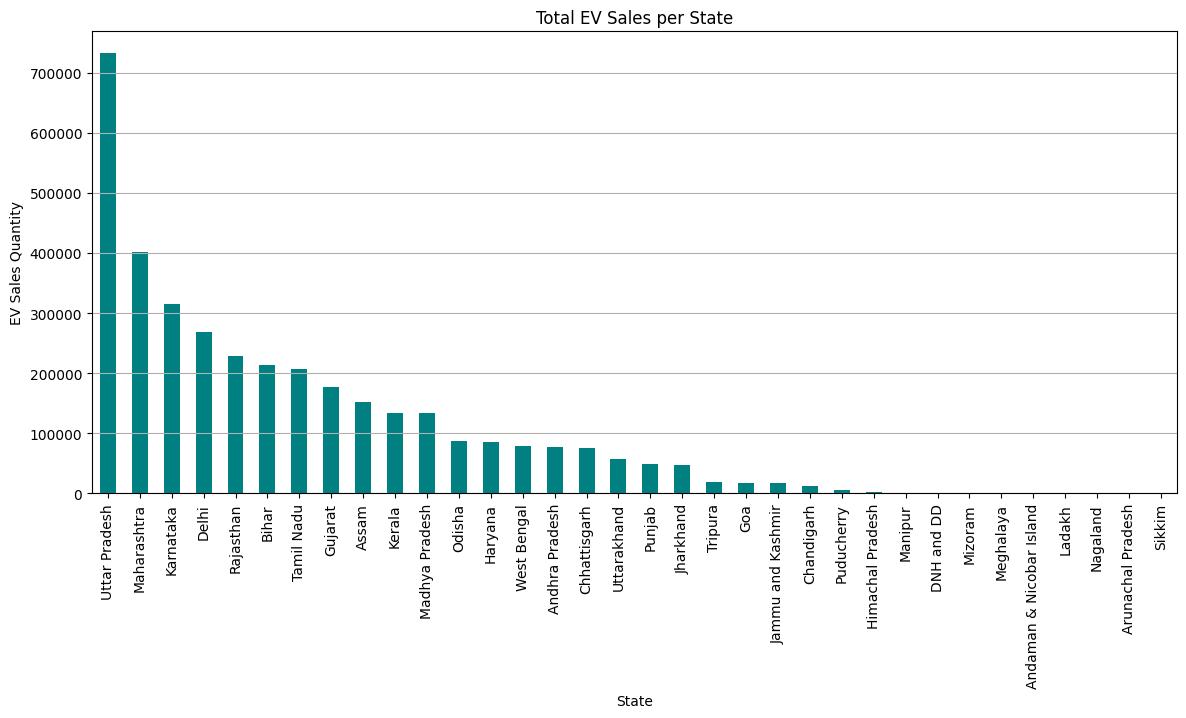

In [ ]:
# 1. Total EV Sales per State
state_sales = df3.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
state_sales.plot(kind='bar', color='teal')
plt.title('Total EV Sales per State')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

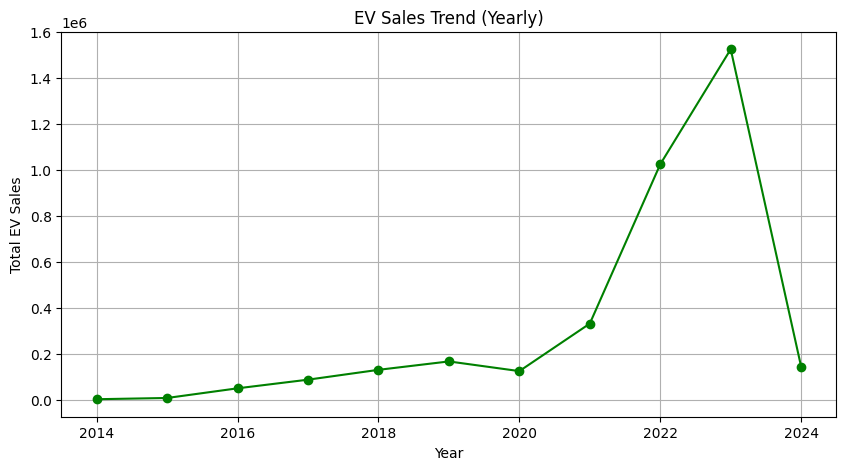

In [ ]:
#  2. EV Sales Trend Over Years
year_sales = df3.groupby('Year')['EV_Sales_Quantity'].sum()

plt.figure(figsize=(10,5))
year_sales.plot(marker='o', linestyle='-', color='green')
plt.title('EV Sales Trend (Yearly)')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.grid()
plt.show()

<ipython-input-29-b65ac867af0b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_type_sales.index, y=vehicle_type_sales.values, palette='magma')


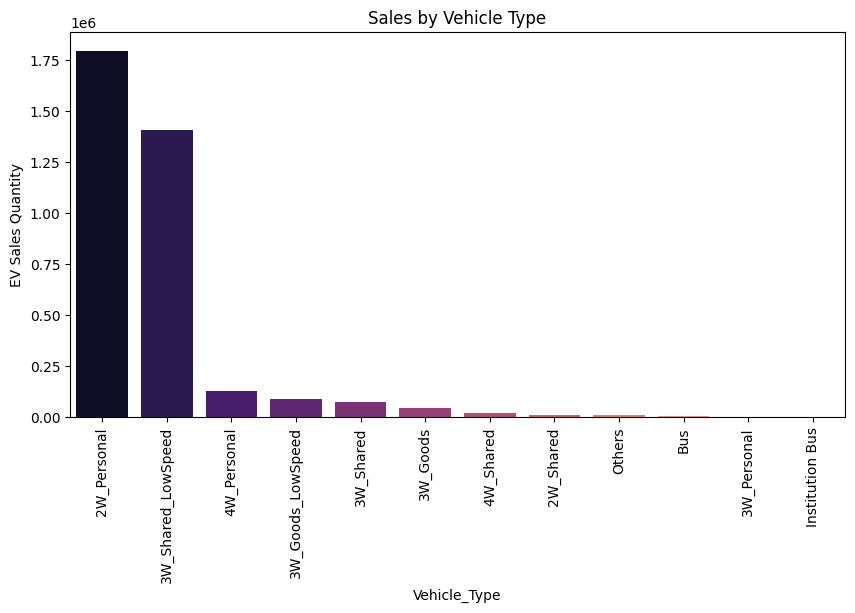

In [ ]:
#  3. Vehicle Type Popularity
vehicle_type_sales = df3.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=vehicle_type_sales.index, y=vehicle_type_sales.values, palette='magma')
plt.title('Sales by Vehicle Type')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=90)
plt.show()

## **Data visualization from dataset 4**

<ipython-input-30-9e7ab681b1cf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='State', y='No. of Operational PCS', palette='viridis')


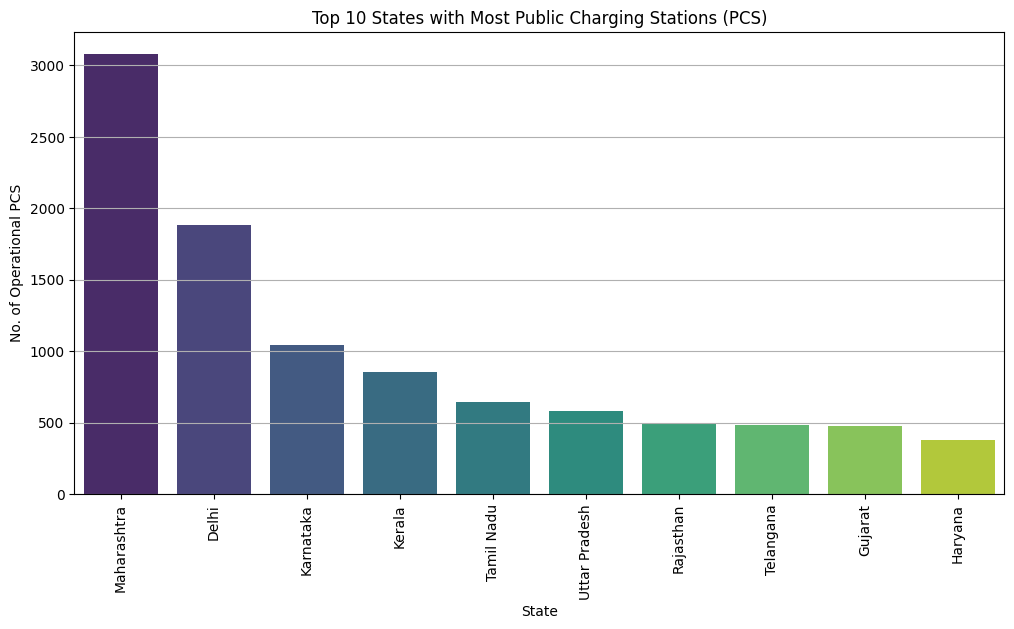

In [ ]:
#  1. Top 10 States with Most PCS
top_states = df4.sort_values(by='No. of Operational PCS', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_states, x='State', y='No. of Operational PCS', palette='viridis')
plt.title('Top 10 States with Most Public Charging Stations (PCS)')
plt.xticks(rotation=90)
plt.ylabel('No. of Operational PCS')
plt.grid(axis='y')
plt.show()

<ipython-input-31-01998e904321>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_states, x='State', y='No. of Operational PCS', palette='magma')


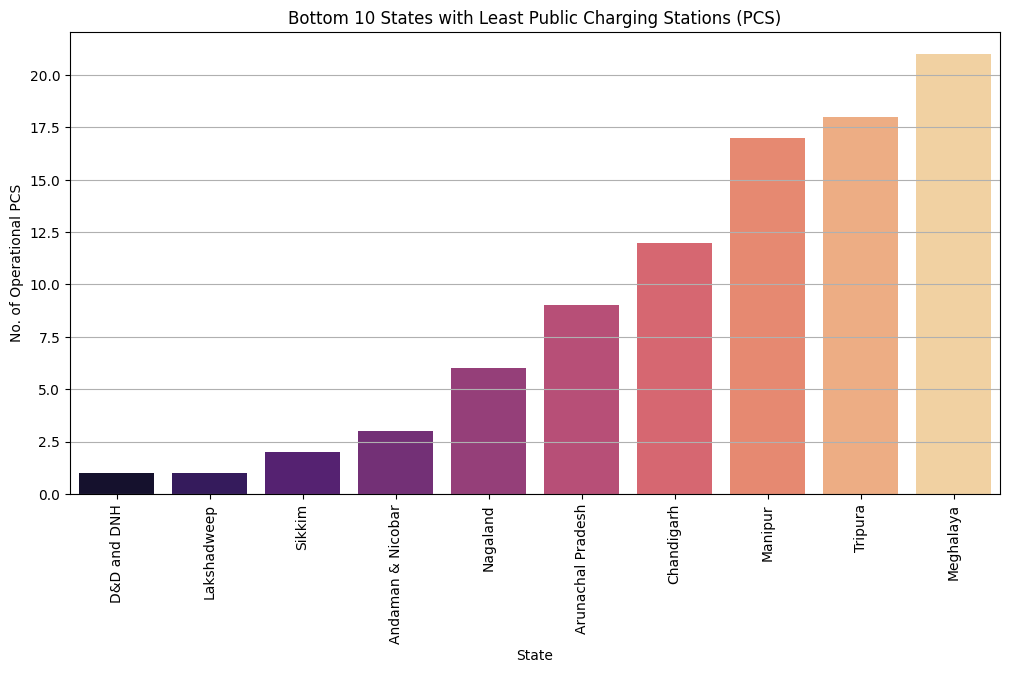

In [ ]:
#  2. Bottom 10 States with Least PCS
bottom_states = df4.sort_values(by='No. of Operational PCS', ascending=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=bottom_states, x='State', y='No. of Operational PCS', palette='magma')
plt.title('Bottom 10 States with Least Public Charging Stations (PCS)')
plt.xticks(rotation=90)
plt.ylabel('No. of Operational PCS')
plt.grid(axis='y')
plt.show()

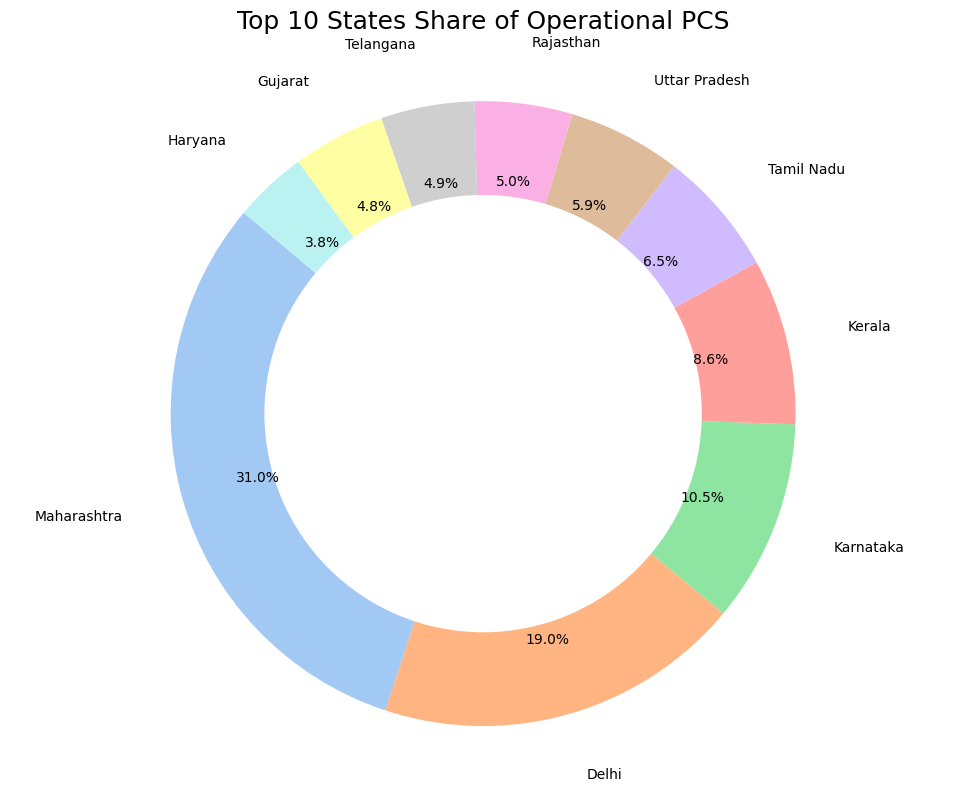

In [ ]:
# Top 10 states
top10_pcs = df4.sort_values(by='No. of Operational PCS', ascending=False).head(10)

# Pie chart
plt.figure(figsize=(10,8))
plt.pie(
    top10_pcs['No. of Operational PCS'],
    labels=top10_pcs['State'],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.75,     # % value inside
    labeldistance=1.2,    # Label (State name) far from pie
    colors=sns.color_palette('pastel')
)

# Donut style (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title with space (pad=20 adds vertical space)
plt.title('Top 10 States Share of Operational PCS', fontsize=18, pad=30)

plt.axis('equal')
plt.tight_layout()
plt.show()

### **Using RandomForest Model**

Mean Absolute Error: 13.033895766064825
Root Mean Squared Error: 143.56037057984156
R2 Score: 0.9208561749064633


<Axes: title={'center': 'Feature Importance'}>

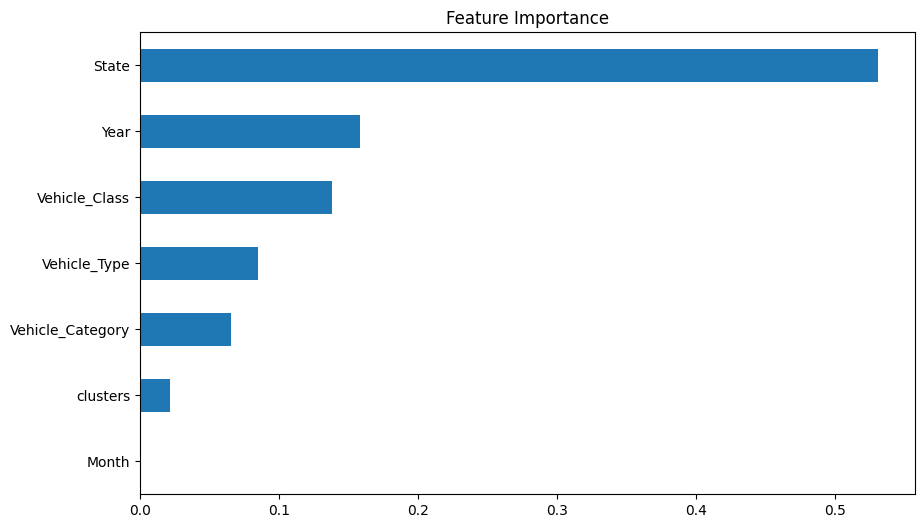

In [ ]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===== 1. Preprocessing =====
# Convert Month_Name to Month Number
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df3['Month'] = df3['Month_Name'].map(month_map)

# Drop unnecessary columns
df = df3.drop(['Month_Name', 'Date'], axis=1)

# Encode categorical columns
le = LabelEncoder()
for col in ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']:
    df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop('EV_Sales_Quantity', axis=1)
y = df['EV_Sales_Quantity']

# ===== 2. Train-Test Split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== 3. Model Training =====
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ===== 4. Model Evaluation =====
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

# ===== 5. Feature Importance (Bonus) =====
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title='Feature Importance')


## **Using K means clustering Model**

In [ ]:
# Import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Encode categorical features
label_cols = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
le = LabelEncoder()
for col in label_cols:
    df3[col] = le.fit_transform(df3[col])

In [ ]:
# Step 3: Selecting features for building model
X = df3[['Year', 'Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']]

In [ ]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Step 5: PCA
pca = PCA(n_components=X.shape[1])  # Keep all components first
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])


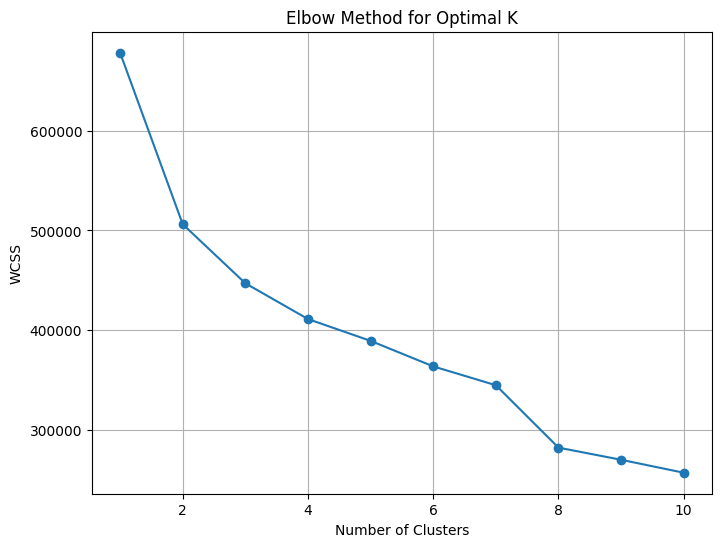

In [ ]:
# Step 6: Elbow Method to find best K
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmean.fit(X_pca)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [ ]:
# Step 7: Apply KMeans with chosen K (Suppose K=4 after elbow plot)
kmean = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmean.fit(X_pca)


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Step 8: Add clusters to original dataframe
df3['clusters'] = kmean.labels_


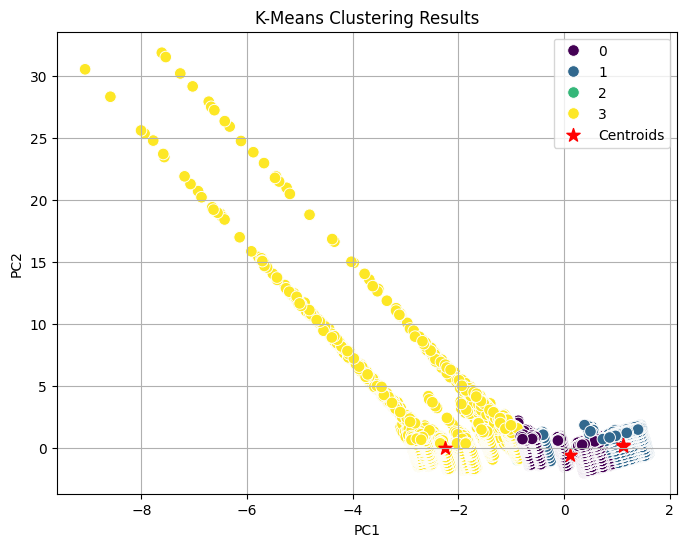

In [ ]:
# Step 9: Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=kmean.labels_, palette='viridis', s=70)
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], marker="*", c="red", s=100, label='Centroids')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Step 10: Checking cluster sizes
print(pd.Series(kmean.labels_).value_counts())

0    24825
3    24684
1    23961
2    23375
Name: count, dtype: int64
